In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv(r'C:\Users\Home\Downloads\customer_churn_telecom.csv')

In [18]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


EDA

In [21]:
df.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [23]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [27]:
df.describe().round(2)

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.00,64374.00,64374.00,64374.00,64374.00,64374.00,64374.00,64374.00,64374.00
mean,32187.50,41.97,31.99,15.08,5.40,17.13,541.02,15.50,0.47
std,18583.32,13.92,17.10,8.82,3.11,8.85,260.87,8.64,0.50
min,1.00,18.00,1.00,1.00,0.00,0.00,100.00,1.00,0.00
25%,16094.25,30.00,18.00,7.00,3.00,10.00,313.00,8.00,0.00
50%,32187.50,42.00,33.00,15.00,6.00,19.00,534.00,15.00,0.00
75%,48280.75,54.00,47.00,23.00,8.00,25.00,768.00,23.00,1.00
max,64374.00,65.00,60.00,30.00,10.00,30.00,1000.00,30.00,1.00


In [29]:
# Generate the Sweetviz report
#import sweetviz as sv
#report = sv.analyze(df)

# Show the report
#report.show_html('Customer_Churn_Report.html')

Step 2:Feature Enginnering

In [32]:
# Remove unnecessary columns
df = df.drop(columns=['CustomerID'])

In [34]:
df.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [36]:
# Define categorical and numerical columns
categorical_cols = ['Gender']
ordinal_col = ['Subscription Type','Contract Length']
numerical_cols = ['Age','Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend',
       'Last Interaction']

In [38]:
df['Subscription Type'].value_counts()

Subscription Type
Standard    21502
Basic       21451
Premium     21421
Name: count, dtype: int64

In [40]:
df['Contract Length'].value_counts()

Contract Length
Monthly      22130
Annual       21410
Quarterly    20834
Name: count, dtype: int64

In [42]:
# Apply Ordinal Encoding for 'Card Type'
ordinal_encoder = OrdinalEncoder(categories=[['Basic','Standard','Premium'],['Monthly', 'Quarterly','Annual']])
df[ordinal_col] = ordinal_encoder.fit_transform(df[ordinal_col])

In [44]:
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,0.0,0.0,598,9,1
1,41,Female,28,28,7,13,1.0,0.0,584,20,0
2,47,Male,27,10,2,29,2.0,2.0,757,21,0
3,35,Male,9,12,5,17,2.0,1.0,232,18,0
4,53,Female,58,24,9,2,1.0,2.0,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,0.0,1.0,947,14,1
64370,37,Male,6,1,5,22,1.0,2.0,923,9,1
64371,25,Male,39,14,8,30,2.0,0.0,327,20,1
64372,50,Female,18,19,7,22,1.0,0.0,540,13,1


In [46]:
df['Subscription Type'].value_counts()

Subscription Type
1.0    21502
0.0    21451
2.0    21421
Name: count, dtype: int64

In [48]:
df['Contract Length'].value_counts()

Contract Length
0.0    22130
2.0    21410
1.0    20834
Name: count, dtype: int64

In [50]:
# Apply One-Hot Encoding for 'Geography' and 'Gender'
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_cols]), columns=one_hot_encoder.get_feature_names_out(categorical_cols))
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_categorical], axis=1)

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
df

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Gender_Male
0,22,25,14,4,27,0.0,0.0,598,9,1,0.0
1,41,28,28,7,13,1.0,0.0,584,20,0,0.0
2,47,27,10,2,29,2.0,2.0,757,21,0,1.0
3,35,9,12,5,17,2.0,1.0,232,18,0,1.0
4,53,58,24,9,2,1.0,2.0,533,18,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,33,12,6,21,0.0,1.0,947,14,1,0.0
64370,37,6,1,5,22,1.0,2.0,923,9,1,1.0
64371,25,39,14,8,30,2.0,0.0,327,20,1,1.0
64372,50,18,19,7,22,1.0,0.0,540,13,1,0.0


In [54]:
# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [56]:
##Outlier removal
df.describe().round(2)

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Gender_Male
count,64374.00,64374.00,64374.00,64374.00,64374.00,64374.00,64374.00,64374.00,64374.00,64374.00,64374.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,1.00,0.99,-0.00,0.00,0.47,0.47
std,1.00,1.00,1.00,1.00,1.00,0.82,0.82,1.00,1.00,0.50,0.50
min,-1.72,-1.81,-1.60,-1.73,-1.94,0.00,0.00,-1.69,-1.68,0.00,0.00
25%,-0.86,-0.82,-0.92,-0.77,-0.81,0.00,0.00,-0.87,-0.87,0.00,0.00
50%,0.00,0.06,-0.01,0.19,0.21,1.00,1.00,-0.03,-0.06,0.00,0.00
75%,0.86,0.88,0.90,0.83,0.89,2.00,2.00,0.87,0.87,1.00,1.00
max,1.65,1.64,1.69,1.48,1.45,2.00,2.00,1.76,1.68,1.00,1.00


In [58]:
#import numpy as np
# Cap z-scores at 3 for 'Age' and 'NumOfProducts'
#z_age_capped = np.clip(df['Age'], -3, 3)
#z_numofproducts_capped = np.clip(df['NumOfProducts'], -3, 3)

#df['Age'] = z_age_capped
#df['NumOfProducts'] = z_numofproducts_capped

In [60]:
df.describe().round(2)

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Gender_Male
count,64374.00,64374.00,64374.00,64374.00,64374.00,64374.00,64374.00,64374.00,64374.00,64374.00,64374.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,1.00,0.99,-0.00,0.00,0.47,0.47
std,1.00,1.00,1.00,1.00,1.00,0.82,0.82,1.00,1.00,0.50,0.50
min,-1.72,-1.81,-1.60,-1.73,-1.94,0.00,0.00,-1.69,-1.68,0.00,0.00
25%,-0.86,-0.82,-0.92,-0.77,-0.81,0.00,0.00,-0.87,-0.87,0.00,0.00
50%,0.00,0.06,-0.01,0.19,0.21,1.00,1.00,-0.03,-0.06,0.00,0.00
75%,0.86,0.88,0.90,0.83,0.89,2.00,2.00,0.87,0.87,1.00,1.00
max,1.65,1.64,1.69,1.48,1.45,2.00,2.00,1.76,1.68,1.00,1.00


In [62]:
###Step 3:Model Building
# Define features (X) and target (y)
from sklearn.neighbors import KNeighborsClassifier
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model= KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
##step 4:Model Prediction

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     10134
           1       0.88      0.94      0.91      9179

    accuracy                           0.91     19313
   macro avg       0.91      0.91      0.91     19313
weighted avg       0.91      0.91      0.91     19313



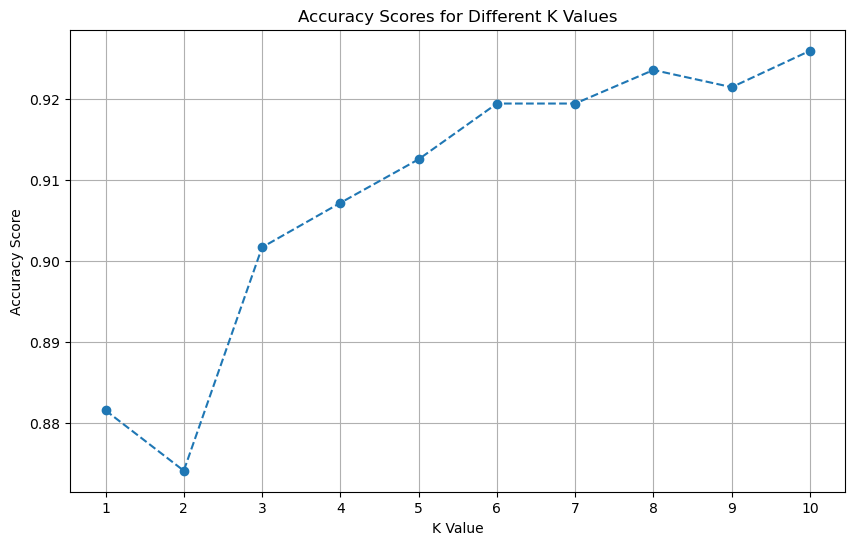

In [75]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# List to store accuracy scores for different K values
accuracy_scores = []

# Loop through a range of K values to find the best one
k_range = range(1, 11)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
# Plot the accuracy scores for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='dashed')
plt.title('Accuracy Scores for Different K Values')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()